In [23]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [24]:
from keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    metrics=['acc']
)

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory('train_dir',target_size=(150, 150), batch_size=20,class_mode='binary') 
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_directory('Val_dir',target_size=(150, 150), batch_size=20,class_mode='binary')                                     

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


C:\Users\alogi\AppData\Local\Temp\ipykernel_16952\984291649.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


100/100 [==============================] - 26s 235ms/step - loss: 0.6911 - acc: 0.5400 - val_loss: 0.6820 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 23s 232ms/step - loss: 0.6709 - acc: 0.5975 - val_loss: 0.6601 - val_acc: 0.6010
Epoch 3/30
100/100 [==============================] - 24s 240ms/step - loss: 0.6456 - acc: 0.6285 - val_loss: 0.6392 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 24s 236ms/step - loss: 0.5999 - acc: 0.6875 - val_loss: 0.6052 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 23s 233ms/step - loss: 0.5723 - acc: 0.7015 - val_loss: 0.6059 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 22s 219ms/step - loss: 0.5406 - acc: 0.7220 - val_loss: 0.6058 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 25s 253ms/step - loss: 0.5239 - acc: 0.7370 - val_loss: 0.5808 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 25s 249ms/st

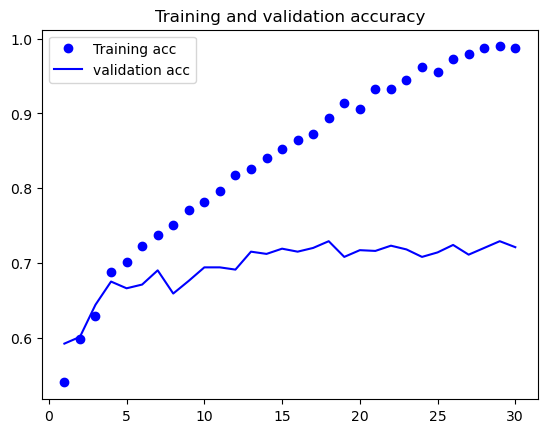

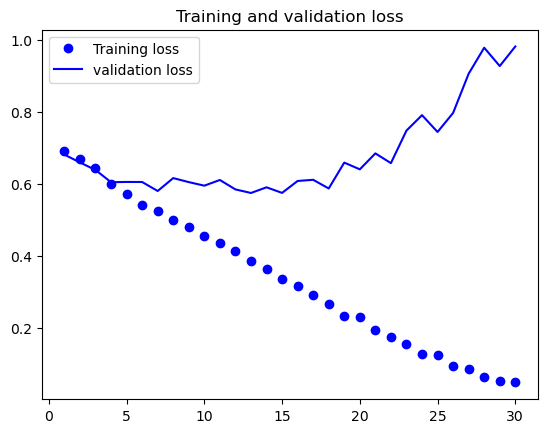

In [30]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()


In [31]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [37]:
from keras.preprocessing import image
import os
fnames=[os.path.join('train_dir\\Cat_train',fname) for fname in os.listdir('train_dir\\Cat_train')]
img_path=fnames[2]
img=image.load_img(img_path,target_size=(150,150))
X=image.img_to_array(img)
X=X.reshape((1,)+X.shape)

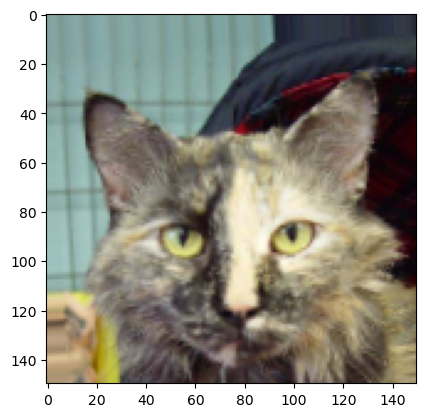

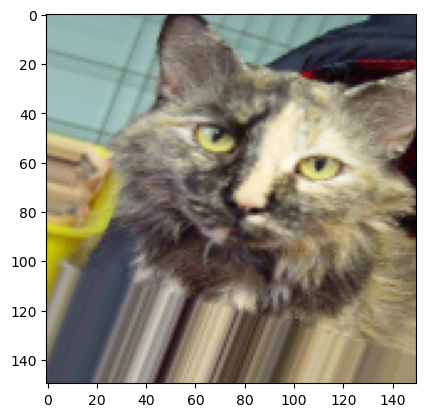

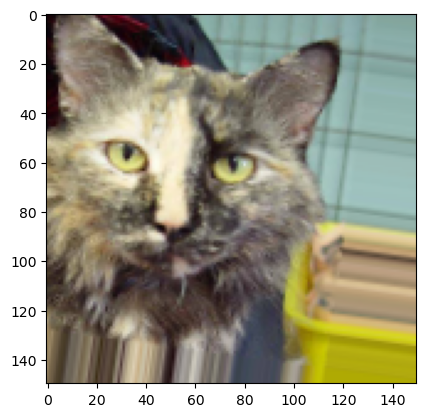

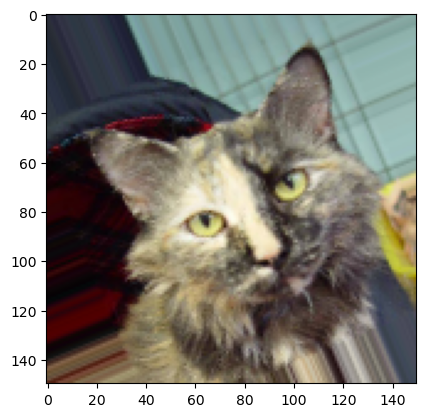

In [41]:
i = 0
for batch in datagen.flow(X, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=0.0001),
 metrics=['acc'])

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    'train_dir',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
    'Val_dir',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\alogi\AppData\Local\Temp\ipykernel_16952\78903911.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


100/100 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5240WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


100/100 [==============================] - 29s 286ms/step - loss: 0.6931 - acc: 0.5240 - val_loss: 0.6873 - val_acc: 0.5030
Epoch 2/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6877 - acc: 0.5445
Epoch 3/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6820 - acc: 0.5580
Epoch 4/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6731 - acc: 0.5805
Epoch 5/100
 17/100 [====>.........................] - ETA: 21s - loss: 0.6748 - acc: 0.5412

KeyboardInterrupt: 